In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Avg Loan data
df = pd.read_excel("./raw_data/Fed_AvgLoan_2000Q1_2025Q4.xlsx",
            skiprows=6,usecols=[0,3,8])
df_fed = df.rename(columns={"Time Period": "Quarter", "STFBAILB_XQA_XS1A2_MA_N.Q": "Wholesale_Proxy_AvgLoan", "STFBAILCC_XQA_XS1A2_MA_N.Q": "Retail_Proxy_AvgLoan"})   

df_fed['Quarter_dt'] = pd.PeriodIndex(df_fed['Quarter'], freq='Q').to_timestamp()

df_fed = df_fed.set_index('Quarter_dt').sort_index()
df_fed = df_fed.drop(columns=['Quarter'])

for col in df_fed.columns:
    df_fed[col] = (
        df_fed[col]
        .astype(str)
        .str.replace('%','', regex=False)
    )
    df_fed[col] = pd.to_numeric(df_fed[col], errors='coerce')

df_fed      

,Wholesale_Proxy_AvgLoan,Retail_Proxy_AvgLoan
Quarter_dt,,
2000-01-01,835842,161806
2000-04-01,857096,172818
2000-07-01,869474,183728
2000-10-01,888752,196106
2001-01-01,853241,172441
...,...,...
2024-07-01,2077550,970202
2024-10-01,2032871,989734
2025-01-01,1989700,986158


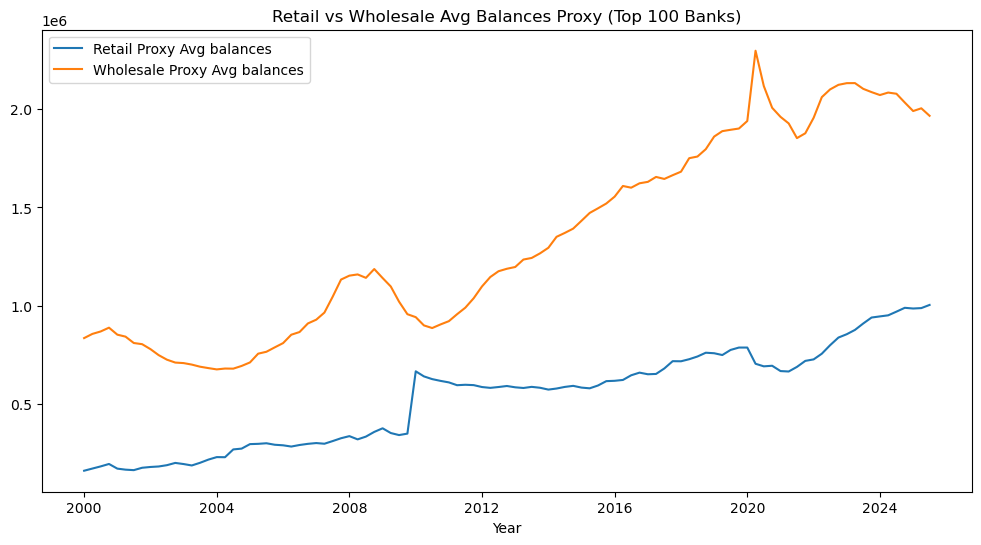

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df_fed.index, df_fed["Retail_Proxy_AvgLoan"], label="Retail Proxy Avg balances")
plt.plot(df_fed.index, df_fed["Wholesale_Proxy_AvgLoan"], label="Wholesale Proxy Avg balances")

plt.legend()
plt.xlabel("Year")
plt.title("Retail vs Wholesale Avg Balances Proxy (Top 100 Banks)")
plt.show()


In [9]:
OUTPUT_PATH = "./output/Fed_AvgLoan.csv"

df_fed.to_csv(OUTPUT_PATH, index=True)

print(f"Saved cleaned Fed AvgLoan data to {OUTPUT_PATH}")

Saved cleaned Fed AvgLoan data to ./output/Fed_AvgLoan.csv
